# Imports

In [132]:
import math
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

from sklearn.tree import export_graphviz
import graphviz

# Data Loading

**Column Descriptions**
- **crim**<br>
per capita crime rate by town.
- **zn**<br>
proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus**<br>
proportion of non-retail business acres per town.
- **chas**<br>
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox**<br>
nitrogen oxides concentration (parts per 10 million).
- **rm**<br>
average number of rooms per dwelling.
- **age**<br>
proportion of owner-occupied units built prior to 1940.
- **dis**<br>
weighted mean of distances to five Boston employment centres.
- **rad**<br>
index of accessibility to radial highways.
- **tax**<br>
full-value property-tax rate per \$10,000.
- **ptratio**<br>
pupil-teacher ratio by town.
- **black**<br>
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- **lstat**<br>
lower status of the population (percent).
- **medv**<br>
median value of owner-occupied homes in \$1000s.

In [133]:
df = pd.read_csv('boston_housing.csv')

In [134]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [136]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [137]:
df.duplicated().any()

False

# Data Visualization

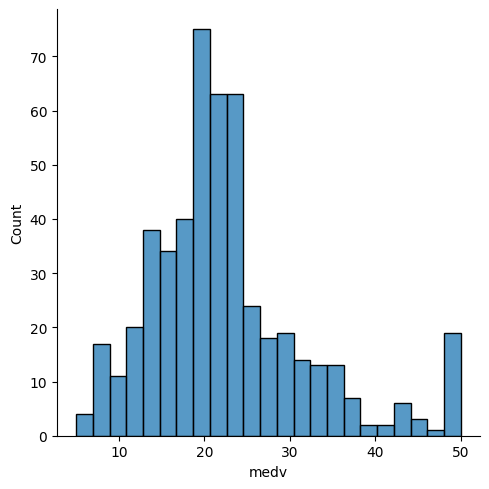

In [138]:
sns.displot(df['medv'])
plt.show()

We can see that most houses in Boston have a price of around $ 20 000.

In [139]:
df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

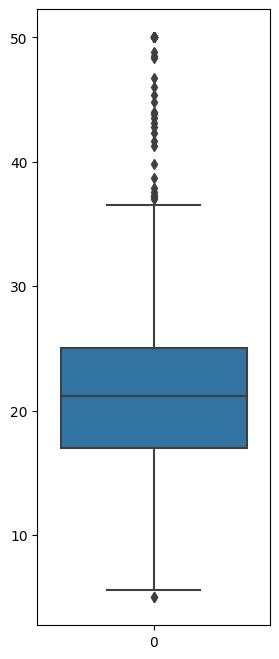

In [140]:
plt.figure(figsize=(3, 8))
sns.boxplot(df['medv'])
plt.show()

We can observe the distribution of housing prices.

# Data Pre-Processing

Divide Dataset into Training (Includes Validation) and Testing Dataset.

In [141]:
features = df.drop('medv', axis=1)
labels = df['medv']

In [142]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=42)

Apply Cross Validation to measure which **scaling technique** performs the best.

In [143]:
ss = StandardScaler()
mm = MinMaxScaler()
features_ss = ss.fit_transform(x_train)
features_mm = mm.fit_transform(x_train)

In [144]:
print('Cross Val Score for Standard Scaler: ')
result = cross_val_score(LinearRegression(), features_ss, y_train, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for Standard Scaler: 
0.7070238943109336


In [145]:
print('Cross Val Score for MinMax Scaler: ')
result = cross_val_score(LinearRegression(), features_mm, y_train, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for MinMax Scaler: 
0.7070238943109336


There is no difference in model's validation accuracy between using the two scalers.

In [146]:
x_test = ss.fit_transform(x_test)

# Data Modeling

Let's use cross validation to compare the performances between different **Regression Models**.

In [147]:
print('Cross Val Score for Super Vector Machine: ')
result = cross_val_score(SVR(), features_ss, y_train, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for Super Vector Machine: 
0.6173951641444025


In [148]:
print('Cross Val Score for Decision Trees: ')
result = cross_val_score(DecisionTreeRegressor(), features_ss, y_train, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for Decision Trees: 
0.7476504716917859


In [149]:
print('Cross Val Score for Random Forest: ')
result = cross_val_score(RandomForestRegressor(), features_ss, y_train, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for Random Forest: 
0.8521434246158002


Among 4 models, Random Forest has the most robust performance.

# Feature Selection

Let's look at the model's feature importance.

In [150]:
model = RandomForestRegressor()
model.fit(features_ss, y_train)
model.score(x_test, y_test)

0.8271981167078655

In [151]:
feat_impo = pd.Series(model.feature_importances_, index=features.columns).sort_values()

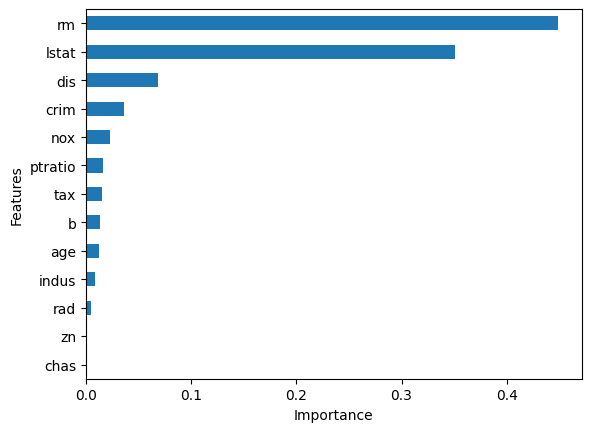

In [152]:
feat_impo.plot(kind="barh")
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [153]:
df.corrwith(df['medv']).sort_values().drop('medv')

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
dtype: float64

From the graph and table, we can observe which features have the highest correlation and importance to model's prediction, hence we can select useful features only.

In [154]:
columns = []
scores = []

for column in (feat_impo.sort_values(ascending=False).index):
    columns.append(column)
    new_features = df[columns]

    x_train, x_test, y_train, y_test = train_test_split(new_features, labels, test_size=0.15, random_state=42)

    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)

    res = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=5, n_jobs=-1)
    mean = np.mean(res)
    scores.append(mean)

    print(f'Features: {columns}')
    print(mean)

Features: ['rm']
0.4168281209888628
Features: ['rm', 'lstat']
0.7164291856155766
Features: ['rm', 'lstat', 'dis']
0.8087152990061657
Features: ['rm', 'lstat', 'dis', 'crim']
0.8281884445792445
Features: ['rm', 'lstat', 'dis', 'crim', 'nox']
0.8420307425976622
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio']
0.847904214717682
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio', 'tax']
0.8546932184139668
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio', 'tax', 'b']
0.8552570159743386
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio', 'tax', 'b', 'age']
0.8516652426417803
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio', 'tax', 'b', 'age', 'indus']
0.8490831584384086
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio', 'tax', 'b', 'age', 'indus', 'rad']
0.8473829483739049
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptratio', 'tax', 'b', 'age', 'indus', 'rad', 'zn']
0.8482966523326976
Features: ['rm', 'lstat', 'dis', 'crim', 'nox', 'ptra

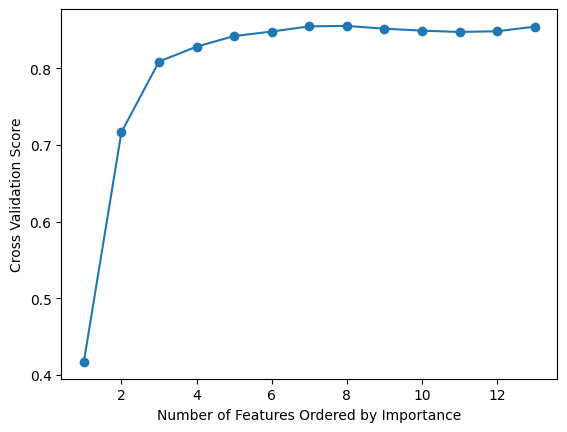

In [155]:
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.xlabel('Number of Features Ordered by Importance')
plt.ylabel('Cross Validation Score')
plt.show()

In [156]:
new_features = df[['rm', 'lstat', 'dis', 'crim', 'nox']]

x_train, x_test, y_train, y_test = train_test_split(new_features, labels, test_size=0.15, random_state=42)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8238965790090423

# Hyperparameter Tuning

Now let's further tune the **hyperparameters** of Random Forest using GridSearchCV.

In [157]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gscv = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [158]:
print(gscv.best_params_)
print(gscv.best_score_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.8724360594092282


# Model Evaluation

Let's evaluate model's performance on totally unseen data -- testing dataset.

In [159]:
y_pred = gscv.predict(x_test)
r2 = r2_score(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [160]:
print('R2 Score :')
print(np.round(r2, decimals=2), "%")
print('RMSE Score :')
print(np.round(rmse, decimals=2))
print('MAE Score :')
print(np.round(mae, decimals=2))

R2 Score :
85.76 %
RMSE Score :
3.05
MAE Score :
2.3


Let us now compare the predicted result with the original labels!

In [161]:
answers = pd.DataFrame(y_test).reset_index()
answers.drop("index", axis=1, inplace=True)
prediction = pd.DataFrame(np.round(y_pred, decimals=1))
pred_compare = pd.concat([answers, prediction], axis=1)
pred_compare.columns = ["Labels", "Prediction"]

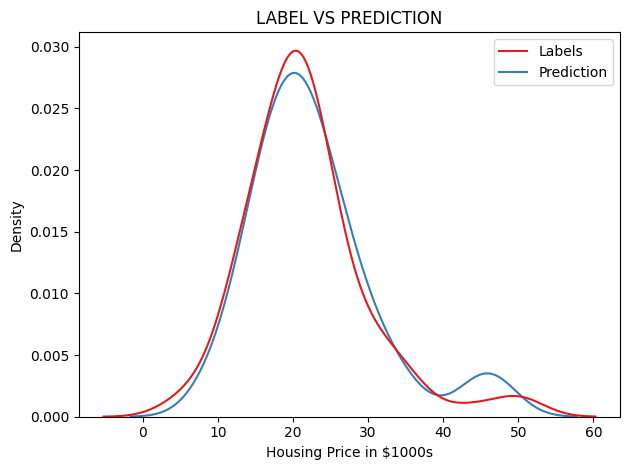

In [162]:
sns.kdeplot(data=pred_compare, palette="Set1")
plt.title("LABEL VS PREDICTION")
plt.xlabel("Housing Price in $1000s")
plt.tight_layout()
plt.savefig("model report.png", dpi=300)
plt.show()

Random Forest is composed of many decision trees combined together using ensemble bagging method, let's visualize how the model comes up with the predictions.

In [163]:
# # Get the first tree from the random forest
# tree = model.estimators_[0]

# # Export the decision tree to a dot file
# export_graphviz(tree, out_file='tree.dot', 
#                 feature_names = new_features.columns.values, 
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Use graphviz to render the tree
# with open('tree.dot') as f:
#     dot_graph = f.read()

# graph = graphviz.Source(dot_graph)
# graph.render(filename='tree', format='png')

In [164]:
joblib.dump(gscv.best_estimator_, "model.pkl")

['model.pkl']

In [165]:
model = joblib.load("model.pkl")

In [166]:
print(f"Test Data Accuracy: {np.round(model.score(x_test, y_test)*100, decimals=2)} %")

Test Data Accuracy: 85.76 %
